Tutorial 2: Processing multiple DEM's
---

In this example, we will learn how to load multiple DEM files, and how to use them to remesh a user provided `geom`. 

The mesh boundary (geom) can be provided by the user from multiple different sources.

For example:
- A `Polygon` or `MultiPolygon` generated from a raster file (see tutorial 1).
- A shapefile (or any vector-geometry format) that contains a `Polygon` or `MultiPolygon`.
- Any previous mesh can be used as input `geom`.

In this example, we will use the boundaries from a previous mesh as input `geom`, and we will remesh the interior of the input mesh.

In this example we will use a test mesh for the Delaware Bay.

<IPython.core.display.Javascript object>


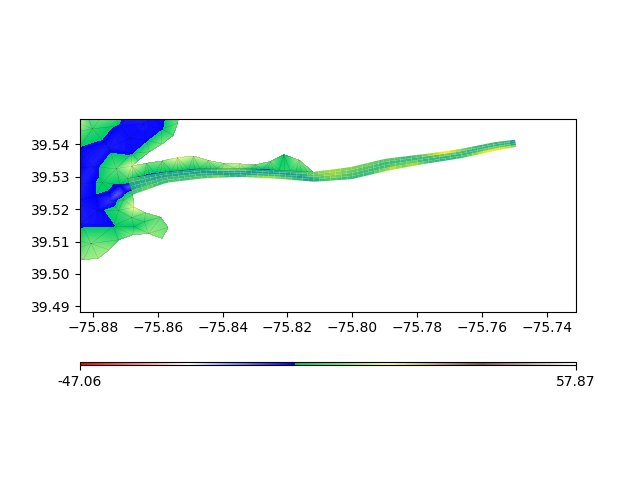

<AxesSubplot:>

In [1]:
%matplotlib notebook
from geomesh import Mesh
mesh = Mesh.open('https://raw.githubusercontent.com/geomesh/test-data/main/NWM/hgrid.ll', crs='epsg:4326')
mesh.make_plot(show=True, elements=True)

We will use the topological boundaries of this mesh as our basis for our new mesh, so we load this mesh as a `geom`.

<IPython.core.display.Javascript object>


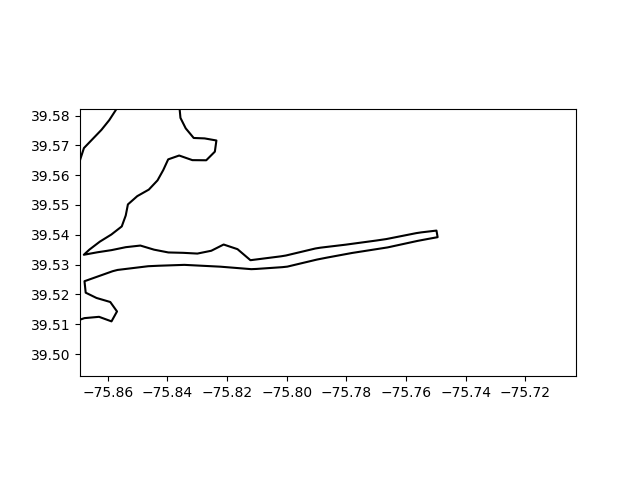

<AxesSubplot:>

In [2]:
from geomesh import Geom
geom = Geom(mesh)
geom.make_plot(show=True)

Since the input mesh contains quads, we can freeze them. The blue lines represent "frozen" geometries.

<IPython.core.display.Javascript object>


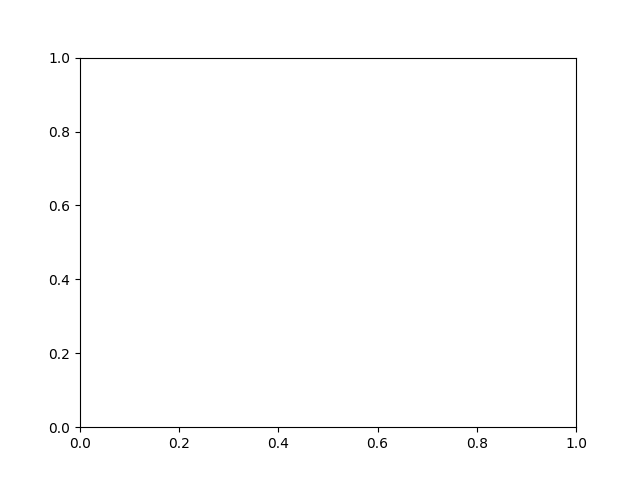

> /home/jreniel/geomesh-dev/geomesh/geomesh/geom/mesh.py(81)multipolygon()
     78         mp = self.get_multipolygon()
     79         if self.freeze_quads:
     80             breakpoint()
---> 81             raise NotImplementedError('geom.mesh.multipolygon')
     82         return mp

ipdb> self.mesh.elements
ipdb> gdf = self.mesh.elements.gdf()
*** AttributeError: 'Elements' object has no attribute 'gdf'
ipdb> gdf = self.mesh.elements.geodataframe()
ipdb> gdf
                                                 geometry      id
0       POLYGON ((-75.81648 39.53519, -75.81388 39.531...       1
1       POLYGON ((-75.81648 39.53519, -75.81562 39.531...       2
2       POLYGON ((-75.81648 39.53519, -75.81737 39.531...       3
3       POLYGON ((-75.81648 39.53519, -75.81911 39.531...       4
4       POLYGON ((-75.84450 39.59510, -75.84662 39.592...       5
...                                                   ...     ...
181066  POLYGON ((-76.56101 37.05190, -76.56483 37.047...  181067
181

NotImplementedError: geom.mesh.multipolygon

In [3]:
geom.freeze_quads = True
geom.make_plot(show=True)